Test Pho's timestamp plugin.

Notes from recording in folder 'E:\Nat\Pho_timestamp_test\2011-11-09_16-07-37':

Experiment 1 Recording 1: OE play, OE record, Motive start, motive stop, OE stop record, OE stop play.  
Experiment 2 Recording 1: OE record, Motive start, motive stop, OE stop record (note OE keeps playing here).  
Experiment 2 Recording 2: OE record, Motive start, motive stop, OE stop record.  
Experiment 2 Recording 3: disconnect chip, reconnect, re-record, record stop, play stop (test disconnection issues).  
Re-scan.  
Experiment 3 Recordings 1: OE record on, OE record off.

# IMPORTANT NOTE:
### You must have the plugin in the signal chain BEFORE the record node to have the start time end up in your settings.xml file!

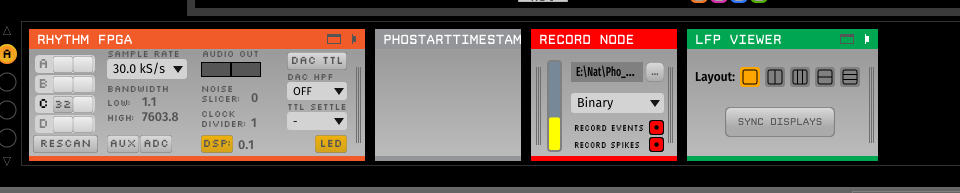

In [61]:
# List folders where things are located
from pathlib import Path
exp1rec1dir = Path(r'E:\Nat\Pho_timestamp_test\2021-11-09_16-07-37\Record Node 102\experiment1\recording1')
exp2rec1dir = Path(r'E:\Nat\Pho_timestamp_test\2021-11-09_16-07-37\Record Node 102\experiment2\recording1')
exp2rec2dir = Path(r'E:\Nat\Pho_timestamp_test\2021-11-09_16-07-37\Record Node 102\experiment2\recording2')
exp2rec3dir = Path(r'E:\Nat\Pho_timestamp_test\2021-11-09_16-07-37\Record Node 102\experiment2\recording3')

In [21]:
#  grab timestamp file
import numpy as np
chan_state_file = sorted(exp1rec1dir.glob('**/channel_states.npy'))[0]
chan_states = np.load(chan_state_file)
chan_times = np.load(chan_state_file.parent / 'timestamps.npy')

In [58]:
# Get start time of both OE and motive
import pandas as pd
# Note that I had to chop off the last 0 in the timestamp to get it to microseconds.
exp1rec1_pho_start = pd.to_datetime("2021-11-09_21:07:37.335008", format="%Y-%m-%d_%H:%M:%S.%f").tz_localize('UTC').tz_convert('America/Detroit')
# Note that I had to append on three zeros to the end of the motive start time to get it to microseconds
motive_start = pd.to_datetime("2021-11-09 04.07.39.652000 PM", format="%Y-%m-%d %I.%M.%S.%f %p").tz_localize('America/Detroit')
sync_start = 70912  # from sync_messages.txt file
print(exp1rec1_pho_start)
print(motive_start)

2021-11-09 16:07:37.335008-05:00
2021-11-09 16:07:39.652000-05:00


In [60]:
# Get timestamp for recording TTL and compare it to the motive time!
TTLrec_start = exp1rec1_pho_start + pd.to_timedelta((chan_times[0] - sync_start)/30000, unit='sec')
lag = (TTLrec_start - motive_start).total_seconds()
print(f'TTLrec_start = {TTLrec_start} at lag of {lag:.3g} seconds')

TTLrec_start = 2021-11-09 16:07:39.701808-05:00 at lag of 0.0498 seconds


In [72]:
# Now loop through all 3 files and get it!
folders = [exp1rec1dir, exp2rec1dir, exp2rec2dir]
pho_starts = ["2021-11-09_21:07:37.335008", "2021-11-09_21:08:56.445003", "2021-11-09_21:08:56.445003"]
motive_starts = ["2021-11-09 04.07.39.652000 PM", "2021-11-09 04.08.59.979000 PM", "2021-11-09 04.10.12.431000 PM"]
sync_starts = [70912, 0, 0]
for idr, (folder, pho_start, motive_start, sync_start) in enumerate(zip(folders, pho_starts, motive_starts, sync_starts)):
    chan_state_file = sorted(folder.glob('**/channel_states.npy'))[0]
    chan_states = np.load(chan_state_file)
    chan_times = np.load(chan_state_file.parent / 'timestamps.npy')
    
    # Note that I had to chop off the last 0 in the timestamp to get it to microseconds.
    pho_start_dt = pd.to_datetime(pho_start, format="%Y-%m-%d_%H:%M:%S.%f").tz_localize('UTC').tz_convert('America/Detroit')
    # Note that I had to append on three zeros to the end of the motive start time to get it to microseconds
    motive_start_dt = pd.to_datetime(motive_start, format="%Y-%m-%d %I.%M.%S.%f %p").tz_localize('America/Detroit')
    
    # Get timestamp for recording TTL and compare it to the motive time!
    TTLrec_start = pho_start_dt + pd.to_timedelta((chan_times[0] - sync_start)/30000, unit='sec')
    lag = (TTLrec_start - motive_start_dt).total_seconds()
    print(f' Recording {idr}: Motive = {motive_start_dt} vs TTL = {TTLrec_start} at lag of {lag:.3g} seconds ')

 Recording 0: Motive = 2021-11-09 16:07:39.652000-05:00 vs TTL = 2021-11-09 16:07:39.701808-05:00 at lag of 0.0498 seconds 
 Recording 1: Motive = 2021-11-09 16:08:59.979000-05:00 vs TTL = 2021-11-09 16:09:00.010269667-05:00 at lag of 0.0313 seconds 
 Recording 2: Motive = 2021-11-09 16:10:12.431000-05:00 vs TTL = 2021-11-09 16:10:12.442436333-05:00 at lag of 0.0114 seconds 
